In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
webevent_data = pd.read_csv('webevent_v.csv')
webevent_data.head()

,id,event_stamp,action,category,label,ip,visitor_guid,user_agent,url,json
0,109188722,2020-09-04 20:17:51.407000,pageview,NaN,NaN,98.148.1.185,3c41a04d70044e49bbccead33388733f,NaN,https://www.rexhomes.com/compare/rex,"{'source': 'fb', 'campaign': 'buyer_la_regiona..."
1,109188735,2020-09-04 20:17:55.184000,pageview,NaN,NaN,98.148.1.185,3c41a04d70044e49bbccead33388733f,NaN,https://www.rexhomes.com/compare/rex,"{'source': 'fb', 'campaign': 'buyer_la_regiona..."
2,109211987,2020-09-04 23:00:37.745000,pageview,NaN,NaN,98.148.1.185,3c41a04d70044e49bbccead33388733f,NaN,https://www.rexhomes.com/sell-with-rex,"{'source': 'fb', 'campaign': 'buyer_la_regiona..."
3,109211992,2020-09-04 23:00:39.676000,pageview,NaN,NaN,98.148.1.185,3c41a04d70044e49bbccead33388733f,NaN,https://www.rexhomes.com/sell-with-rex,"{'source': 'fb', 'campaign': 'buyer_la_regiona..."
4,108604646,2020-09-01 00:07:05.944000,pageview,NaN,NaN,74.125.150.85,bd73ee3ba36f45858d3e967cba74f006,AdsBot-Google (+http://www.google.com/adsbot.h...,https://www.rexhomes.com/sell-with-rex?utm_sou...,"{'domain': 'www.rexhomes.com', 'uriStem': '/se..."


### action

In [17]:
# we only care about the observations with url having "listing"
listing_df = webevent_data[webevent_data['url'].str.contains('listing')]
listing_df.action.unique()

array(['ViewContent', 'view_item', 'pageview', 'click', 'scroll', 'drag',
       'change', 'submit', 'InitiateCheckout', 'add_to_cart', 'Purchase',
       'purchase', 'submit-success', 'nav', 'success', 'open-form',
       'lead', 'enter-flow', 'phone-click', 'Search',
       'view_search_results', 'nav-tab', 'open', 'close'], dtype=object)

In [28]:
# scroll is not useful?
listing_without_scroll_df = listing_df[listing_df['action']!='scroll']

In [29]:
counter = Counter(list(listing_without_scroll_df['action']))
counter

Counter({'ViewContent': 58621,
         'view_item': 58620,
         'pageview': 64771,
         'click': 10349,
         'drag': 20857,
         'change': 4300,
         'submit': 355,
         'InitiateCheckout': 61,
         'add_to_cart': 61,
         'Purchase': 53,
         'purchase': 53,
         'submit-success': 71,
         'nav': 87,
         'success': 36,
         'open-form': 124,
         'lead': 42,
         'enter-flow': 65,
         'phone-click': 2,
         'Search': 5,
         'view_search_results': 5,
         'nav-tab': 17,
         'open': 41,
         'close': 56})

([<matplotlib.axis.XTick at 0x11df9fd30>,
 <a list of 23 Text xticklabel objects>)

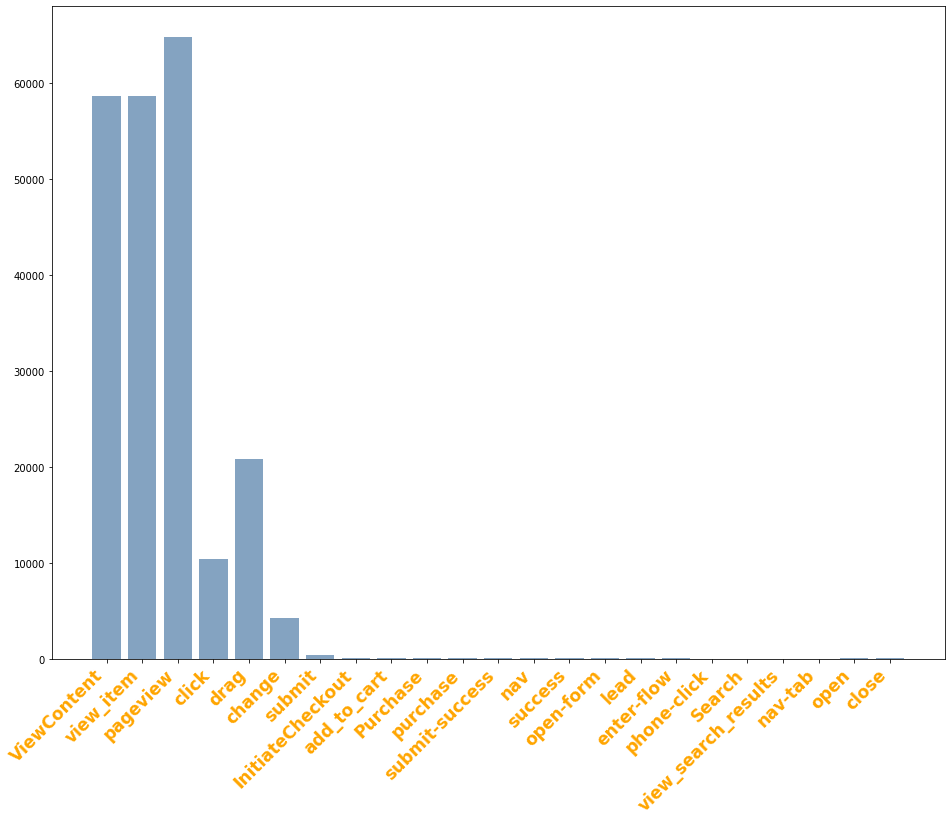

In [30]:
numbers = list(counter.values())
bars = list(counter.keys())
y_pos = np.arange(len(bars))

plt.figure(figsize=(16,12))
plt.bar(y_pos, numbers, color=(0.2, 0.4, 0.6, 0.6))
 
# use the plt.xticks function to custom labels
plt.xticks(y_pos, bars, color='orange', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')


action could be useful for indication of interest

ViewContent (interchangeable with view_item), pageview, click, submit (contains submit-success), InitiateCheckout, add_to_cart, Purchase (should be combined with purchase), success (with category favorite), open-form (with category question, ioi-indication of interest), open (label pricing), drag (with category listing-map), change (payment calculator, label price/downpayment), nav (with category insider-details), nav-tab (with category schools-and-comps, label schools), lead (with category insider-details, label insider-details-lead-attempt/success), enter-flow (with category agent-info, label isagent), phone-click (with category showing, only 2 cases)

not useful: Scroll, Search, view_search_results (only 5 cases), close

### Category

In [60]:
categories = webevent_data.category.unique()
categories

array([nan, 'new-entry', 'submit-address', 'sherpa-close', 'rex-map',
       'location-search', 'nav-homes-for-sale', 'photoCarousel',
       'listing-map', 'nav', 'payment-calculator', 'schools-and-comps',
       'share', 'property-qualify-submit', 'property-qualify-done',
       'listing-preview-completed', 'listing-preview-blackknight',
       'seller-submission', 'showing', 'buyer-lead-form', 'global-nav',
       'footer-cta', 'savings-calculator', 'nav-selling-with-rex',
       'listing-preview-abandoned', 'nav-buy-with-rex', 'sherpa-back',
       'listing-preview-phone', 'nav-header-button', 'nav-login',
       'footer', 'sell-page-nav', 'sell-section-cta',
       'property-qualify-fail', 'insider-details', 'listing-preview-fail',
       'buyer-lead-phone', 'favorite', 'contact-information-form',
       'user-role-form-role-button', 'user-role-form', 'offer-range-form',
       'offer-form', 'mortgage-preapproval-form', 'user-message-form',
       'create-password-form', 'continue

In [62]:
category_counter = Counter(list(webevent_data['category']))
category_counter

Counter({nan: 470091,
         'new-entry': 43,
         'submit-address': 2125,
         'sherpa-close': 177,
         'rex-map': 34880,
         'location-search': 3006,
         'nav-homes-for-sale': 3218,
         'photoCarousel': 635803,
         'listing-map': 24615,
         'nav': 1566,
         'payment-calculator': 4443,
         'schools-and-comps': 195,
         'share': 114,
         'property-qualify-submit': 4189,
         'property-qualify-done': 3306,
         'listing-preview-completed': 3306,
         'listing-preview-blackknight': 1217,
         'seller-submission': 2065,
         'showing': 116,
         'buyer-lead-form': 413,
         'global-nav': 126,
         'footer-cta': 353,
         'savings-calculator': 5665,
         'nav-selling-with-rex': 585,
         'listing-preview-abandoned': 1259,
         'nav-buy-with-rex': 849,
         'sherpa-back': 230,
         'listing-preview-phone': 467,
         'nav-header-button': 79,
         'nav-login': 210,
     

<BarContainer object of 110 artists>

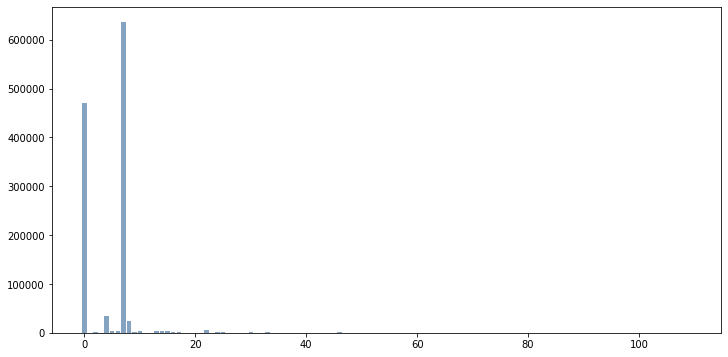

In [66]:
category_nums = list(category_counter.values())
bars = list(category_counter.keys())
y_pos = np.arange(len(bars))

plt.figure(figsize=(12,6))
plt.bar(y_pos, category_nums, color=(0.2, 0.4, 0.6, 0.6))


buyer-lead-phone - user sent us their phone number

buyer-lead-form - user set up some time to talk about a home

favorite - user favorited a home (not a lot of folks do this on our site so maybe not the strongest signal)

ioi - user sent an offer for the home

payment-calculator - user interacted with our payment calculator at the bottom of the home page

In [43]:
interesting_categories = ['buyer-lead-phone','buyer-lead-form', 'favorite', 'ioi', 'favorite-submit', 'payment-calculator']
category_counts = webevent_data['category'].value_counts()
category_counts[interesting_categories]

buyer-lead-phone       274
buyer-lead-form        413
favorite                36
ioi                     88
favorite-submit          2
payment-calculator    4443
Name: category, dtype: int64

In [24]:
webevent_data[webevent_data['category']=='buyer-lead-phone'].head()

,id,event_stamp,action,category,label,ip,visitor_guid,user_agent,url,json
35185,109029124,2020-09-03 20:19:24.269000,submit,buyer-lead-phone,start,100.2.186.240,98786c4728914fb6b7a575ac10aec499,Mozilla/5.0 (iPad; CPU OS 13_1 like Mac OS X) ...,https://www.rexhomes.com/homes?bounds=-75.5635...,"{'domain': 'www.rexhomes.com', 'uriStem': '/ho..."
35186,109029125,2020-09-03 20:19:24.507000,submit,buyer-lead-phone,success,100.2.186.240,98786c4728914fb6b7a575ac10aec499,Mozilla/5.0 (iPad; CPU OS 13_1 like Mac OS X) ...,https://www.rexhomes.com/homes?bounds=-75.5635...,"{'domain': 'www.rexhomes.com', 'uriStem': '/ho..."
46439,109535953,2020-09-06 00:56:08.882000,submit,buyer-lead-phone,start,100.2.156.114,048ca18c2cd14e95886d9044ca223127,Mozilla/5.0 (iPad; CPU OS 13_6_1 like Mac OS X...,https://www.rexhomes.com/listing/1006-e-59th-s...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
46440,109535954,2020-09-06 00:56:08.882000,submit,buyer-lead-phone,start,100.2.156.114,048ca18c2cd14e95886d9044ca223127,Mozilla/5.0 (iPad; CPU OS 13_6_1 like Mac OS X...,https://www.rexhomes.com/listing/1006-e-59th-s...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
46441,109535957,2020-09-06 00:56:09.090000,submit,buyer-lead-phone,success,100.2.156.114,048ca18c2cd14e95886d9044ca223127,Mozilla/5.0 (iPad; CPU OS 13_6_1 like Mac OS X...,https://www.rexhomes.com/listing/1006-e-59th-s...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."


duplicates? exact the same?

In [25]:
webevent_data[webevent_data['category']=='buyer-lead-form'].head()

,id,event_stamp,action,category,label,ip,visitor_guid,user_agent,url,json
22454,109758370,2020-09-07 01:50:19.951000,submit,buyer-lead-form,start,107.77.224.233,04dbc07538c144ea8d24a1c2530dd089,"[FBAN/FBIOS;FBDV/iPhone11,6;FBMD/iPhone;FBSN/...",https://www.rexhomes.com/listing/45-crescent-c...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
22455,109758369,2020-09-07 01:50:19.951000,submit,buyer-lead-form,start,107.77.224.233,04dbc07538c144ea8d24a1c2530dd089,"[FBAN/FBIOS;FBDV/iPhone11,6;FBMD/iPhone;FBSN/...",https://www.rexhomes.com/listing/45-crescent-c...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
22456,109758374,2020-09-07 01:50:20.161000,submit,buyer-lead-form,success,107.77.224.233,04dbc07538c144ea8d24a1c2530dd089,"[FBAN/FBIOS;FBDV/iPhone11,6;FBMD/iPhone;FBSN/...",https://www.rexhomes.com/listing/45-crescent-c...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
22457,109758373,2020-09-07 01:50:20.161000,submit,buyer-lead-form,success,107.77.224.233,04dbc07538c144ea8d24a1c2530dd089,"[FBAN/FBIOS;FBDV/iPhone11,6;FBMD/iPhone;FBSN/...",https://www.rexhomes.com/listing/45-crescent-c...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
32955,109114848,2020-09-04 06:05:25.372000,submit,buyer-lead-form,start,98.116.40.134,41434acb05e844328100388bec920458,Mozilla/5.0 (iPad; CPU OS 12_4_8 like Mac OS X...,https://www.rexhomes.com/listing/1006-e-59th-s...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."


In [31]:
webevent_data[webevent_data['category']=='favorite'].head()

,id,event_stamp,action,category,label,ip,visitor_guid,user_agent,url,json
35665,109033701,2020-09-03 20:52:38.541000,success,favorite,NaN,100.2.186.240,98786c4728914fb6b7a575ac10aec499,Mozilla/5.0 (iPad; CPU OS 13_1 like Mac OS X) ...,https://www.rexhomes.com/listing/181-long-hill...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
35666,109033702,2020-09-03 20:52:38.761000,success,favorite,NaN,100.2.186.240,98786c4728914fb6b7a575ac10aec499,Mozilla/5.0 (iPad; CPU OS 13_1 like Mac OS X) ...,https://www.rexhomes.com/listing/181-long-hill...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
35725,109033975,2020-09-03 20:54:49.989000,success,favorite,NaN,100.2.186.240,98786c4728914fb6b7a575ac10aec499,Mozilla/5.0 (iPad; CPU OS 13_1 like Mac OS X) ...,https://www.rexhomes.com/listing/713-stony-bro...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
35726,109033978,2020-09-03 20:54:50.198000,success,favorite,NaN,100.2.186.240,98786c4728914fb6b7a575ac10aec499,Mozilla/5.0 (iPad; CPU OS 13_1 like Mac OS X) ...,https://www.rexhomes.com/listing/713-stony-bro...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
35730,109034109,2020-09-03 20:55:52.890000,success,favorite,NaN,100.2.186.240,98786c4728914fb6b7a575ac10aec499,Mozilla/5.0 (iPad; CPU OS 13_1 like Mac OS X) ...,https://www.rexhomes.com/listing/125-prospect-...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."


In [34]:
assert len(webevent_data[webevent_data['category']=='favorite']) == len(webevent_data[webevent_data['action']=='success'])


In [35]:
webevent_data[webevent_data['category']=='ioi'].head()

,id,event_stamp,action,category,label,ip,visitor_guid,user_agent,url,json
98460,108689377,2020-09-01 16:51:33.838000,open-form,ioi,NaN,172.58.228.13,996840b1363843e8a70b577fd39c1370,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4_1 like...,https://www.rexhomes.com/listing/106-108-parkv...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
107322,108824940,2020-09-02 14:18:53.129000,open-form,ioi,NaN,172.56.6.90,f5e34f6cdb534dfeab19a8cf1586c930,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like M...,https://www.rexhomes.com/listing/1419-quail-ct...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
130352,109549377,2020-09-06 01:45:31.117000,open-form,ioi,NaN,174.198.21.233,d0ca8c2fefa54f13b02a32f4539977c3,Mozilla/5.0 (iPhone; CPU iPhone OS 13_5_1 like...,https://www.rexhomes.com/listing/12-shingle-oa...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
130353,109549376,2020-09-06 01:45:31.117000,open-form,ioi,NaN,174.198.21.233,d0ca8c2fefa54f13b02a32f4539977c3,Mozilla/5.0 (iPhone; CPU iPhone OS 13_5_1 like...,https://www.rexhomes.com/listing/12-shingle-oa...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
131586,108754006,2020-09-02 00:26:18.869000,open-form,ioi,NaN,67.85.59.188,074e546a43254e1288ef3c56ce74d5be,Mozilla/5.0 (iPhone; CPU iPhone OS 13_5_1 like...,https://www.rexhomes.com/listing/14-downey-pl?...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."


ioi (category) is part of open-form (action), open-form also includes question (category)

In [36]:
webevent_data[webevent_data['category']=='favorite-submit'].head()

,id,event_stamp,action,category,label,ip,visitor_guid,user_agent,url,json
1060307,108815294,2020-09-02 12:38:39.999000,click,favorite-submit,view-homes,123.201.226.69,bbf7b71eb1e04ecd82361f792a3946fd,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://www.rexhomes.com/indication-of-interes...,"{'domain': 'www.rexhomes.com', 'uriStem': '/in..."
1158648,109955336,2020-09-07 21:49:59.076000,click,favorite-submit,view-homes,173.3.63.79,d96144003ef54ee1a11967796beb9f85,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://www.rexhomes.com/indication-of-interes...,"{'domain': 'www.rexhomes.com', 'uriStem': '/in..."


not sure how is favorite-submit different from favorite. it seems that the ip address with favorite-submit doesn't have favorite as category.

In [39]:
webevent_data[webevent_data['category']=='payment-calculator'].head()

,id,event_stamp,action,category,label,ip,visitor_guid,user_agent,url,json
18789,109386988,2020-09-05 01:56:32.809000,change,payment-calculator,downpayment,72.226.6.187,8d552b5fe12d47ee83bd7a6106426343,"[FBAN/FBIOS;FBDV/iPad5,1;FBMD/iPad;FBSN/iOS;F...",https://www.rexhomes.com/listing/150-green-rd?...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
21447,109961396,2020-09-07 23:15:06.786000,change,payment-calculator,downpayment,76.174.177.68,ecf476928e2e4708a0a84ef8e4ee17ef,"[FBAN/FBIOS;FBDV/iPhone11,2;FBMD/iPhone;FBSN/...",https://www.rexhomes.com/listing/945-acacia-ln...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
22649,108675567,2020-09-01 15:07:17.031000,change,payment-calculator,downpayment,24.238.18.158,bba9cdd37144465d98ebc01de0fc564b,"[FBAN/FBIOS;FBDV/iPhone11,8;FBMD/iPhone;FBSN/...",https://www.rexhomes.com/listing/265-custer-av...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
22753,108830791,2020-09-02 15:09:49.038000,change,payment-calculator,downpayment,173.70.92.249,5c1cbe32c1be47c2b571205cfd295aa0,"[FBAN/FBIOS;FBDV/iPhone11,8;FBMD/iPhone;FBSN/...",https://www.rexhomes.com/listing/92-lake-st?ut...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
22754,108830801,2020-09-02 15:09:59.040000,change,payment-calculator,price,173.70.92.249,5c1cbe32c1be47c2b571205cfd295aa0,"[FBAN/FBIOS;FBDV/iPhone11,8;FBMD/iPhone;FBSN/...",https://www.rexhomes.com/listing/92-lake-st?ut...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."


not sure what this means, as it has action of change, and label of downpayment/price.

Category and Label are just explanations for actions. If using Category and Label to indicate buyer interest, then the volume of data would be limited. So preferably, we should select useful actions as indication of buyer interest.

### Label

In [5]:
webevent_data.label.unique()

array([nan, '/indication-of-interest/990-bettina-way', 'sherpa-callout',
       'email_capture', 'map', 'nav-homes-for-sale', 'next',
       'calculate-payment', 'downpayment', 'prev', 'get-directions',
       'location', 'sell-my-home', 'done-submit', 'blacknight-submit',
       'email', 'action-box', 'start', 'success', 'price', 'app',
       'zoom-out', 'visit-faq', 'region', 'nav-selling-with-rex',
       'nav-buy-with-rex', 'phone-submit', 'phone', 'go-back', 'log-in',
       'seller-faq', 'selling-with-rex', 'how-rex-markets', 'about-rex',
       'buyer-faq', 'low-fees', 'savings-calc', 'fail-submit', 'zoom-in',
       'rate', 'submit', 'buyer', 'yes', 'careers', 'subflow_schedulebot',
       'phone_capture', 'view-all', '/faq/seller', '/marketing-rex',
       'disclaimer-scroll', 'agree', 'tooltip', 'partners', 'comparables',
       'correct_property_details', 'buyer-mortgage', 'history',
       'game-changing-technology', 'read-our-reviews', 'buying-with-rex',
       'no', '/in

Category and Label are just explanations for actions. If using Category and Label to indicate buyer interest, then the volume of data would be limited. So preferably, we should select useful actions as indication of buyer interest.

### Visitor GUID

In [69]:
# ip correspond to visitor_guid (one-to-one)?
visitor_dict = webevent_data.set_index('ip')['visitor_guid'].to_dict()
ips = list(webevent_data['ip'])
visitors = list(webevent_data['visitor_guid'])

non_matches = []
for i in range(len(webevent_data)):
    ip = ips[i]
    orig = visitor_dict.get(ip)
    if orig != visitors[i]:
        non_matches.append(ip)
print(len(non_matches))

303054


visitor_guid which is an id identifying a visitor session; it doesn't mean unique id for user.

In [72]:
unique_ip_num = len(list(webevent_data.ip.unique()))
unique_ip_num

59003

In [73]:
unique_visitor_num = len(list(webevent_data.visitor_guid.unique()))
unique_visitor_num

70912

### User Agent

In [7]:
webevent_data.user_agent.unique()

array([nan, 'AdsBot-Google (+http://www.google.com/adsbot.html)',
       'bitlybot/4.0 (+http://bit.ly/)', ...,
       'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:78.0) Gecko/20100101 Firefox/78.0',
       'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:79.0) Gecko/20100101 Firefox/79.0',
       'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:80.0) Gecko/20100101 Firefox/80.0'],
      dtype=object)

not useful feature

### URL

In [8]:
webevent_data.url.unique()

array(['https://www.rexhomes.com/compare/rex',
       'https://www.rexhomes.com/sell-with-rex',
       'https://www.rexhomes.com/sell-with-rex?utm_source=ttd&utm_medium=display&utm_adgroupID=fl4qfwz&utm_creativeID=11u7duaf&utm_tdid=deceddeb-841e-4e92-836b-64460e184583&utm_campaign=n4ht8jh&utm_campaign_name=seller_nat_prospecting_display&utm_content=empty_nesters',
       ...,
       'https://www.rexhomes.com/homes?bounds=-137.84886018638673&size=50&sort=publishDate%2CDESC&status=FOR_SALE',
       'https://www.rexhomes.com/homes?bounds=-122.9453130000002&size=50&sort=publishDate%2CDESC&status=FOR_SALE',
       'https://www.rexhomes.com/homes?bounds=-122.94531299999977&size=50&sort=publishDate%2CDESC&status=FOR_SALE'],
      dtype=object)

assuming we are looking at users who are interested in viewing and purchasing housing properties, the urls we care about are the ones indicating housing listings

### JSON

In [21]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [22]:
ma_data = webevent_data[webevent_data['json'].str.contains('MA')]
ma_data.head()

,id,event_stamp,action,category,label,ip,visitor_guid,user_agent,url,json
217,108622141,2020-09-01 02:14:22.058000,ViewContent,NaN,NaN,74.125.150.86,275b4f8b46f443bb9d619a4038cf776e,AdsBot-Google (+http://www.google.com/adsbot.h...,https://www.rexhomes.com/listing/101-flint-st?...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
223,108622198,2020-09-01 02:15:15.802000,ViewContent,NaN,NaN,74.125.150.86,275b4f8b46f443bb9d619a4038cf776e,AdsBot-Google (+http://www.google.com/adsbot.h...,https://www.rexhomes.com/listing/101-flint-st?...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
259,108623020,2020-09-01 02:24:06.595000,ViewContent,NaN,NaN,74.125.150.84,275b4f8b46f443bb9d619a4038cf776e,AdsBot-Google (+http://www.google.com/adsbot.h...,https://www.rexhomes.com/listing/101-flint-st?...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
265,108623580,2020-09-01 02:28:07.251000,ViewContent,NaN,NaN,74.125.150.81,275b4f8b46f443bb9d619a4038cf776e,AdsBot-Google (+http://www.google.com/adsbot.h...,https://www.rexhomes.com/listing/101-flint-st?...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."
273,108623695,2020-09-01 02:29:21.419000,ViewContent,NaN,NaN,74.125.150.82,275b4f8b46f443bb9d619a4038cf776e,AdsBot-Google (+http://www.google.com/adsbot.h...,https://www.rexhomes.com/listing/101-flint-st?...,"{'domain': 'www.rexhomes.com', 'uriStem': '/li..."


In [16]:
ma_data['converted_json'] = ma_data['json'].map(lambda x: dict(eval(x)))

/Users/weiruchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
ma_df = ma_data['converted_json'].apply(pd.Series)

In [20]:
cleaned_ma_df = ma_df[ma_df['region_code']=='MA']
cleaned_ma_df.head()

,domain,uriStem,refDomain,refUriStem,destinationDomain,destinationUriStem,userGuid,listingGuid,propertyGuid,referrer,market,rexUrl,gclid,sessionGuid,eventAttributes,listingLocation,listingStatus,city_name,continent_code,country_code2,dma_code,latitude,location,longitude,postal_code,region_code,region_name,timezone,source,campaign,medium,geoip,content
20871,www.rexhomes.com,/service/buyerrebate,m.facebook.com,,None,None,None,None,None,http://m.facebook.com,None,None,None,3602133fbcc74e5a9e98eb896c976486,None,None,None,Boston,NA,US,506.0,42.3362,"{'lat': 42.3362, 'lon': -71.0729}",-71.0729,02118,MA,Massachusetts,America/New_York,NaN,NaN,NaN,NaN,NaN
21139,www.rexhomes.com,/compare/rex,m.facebook.com,,None,None,None,None,None,http://m.facebook.com,None,None,None,0b7bad2303224eeb99f645f4f4a5da2f,None,None,None,Newton Center,NA,US,506.0,42.3341,"{'lat': 42.3341, 'lon': -71.1833}",-71.1833,02459,MA,Massachusetts,America/New_York,NaN,NaN,NaN,NaN,NaN
21140,www.rexhomes.com,/compare/rex,m.facebook.com,,None,None,None,None,None,http://m.facebook.com,None,None,None,0b7bad2303224eeb99f645f4f4a5da2f,None,None,None,Newton Center,NA,US,506.0,42.3341,"{'lat': 42.3341, 'lon': -71.1833}",-71.1833,02459,MA,Massachusetts,America/New_York,NaN,NaN,NaN,NaN,NaN
23220,www.rexhomes.com,/listing/4121-n-kolmar-ave,m.facebook.com,,None,None,None,ba62dae93e0f41c4a1fae0b610fbee80,None,http://m.facebook.com,ORD,4121-n-kolmar-ave,None,f75091e4ae494b4f8af16642ca7f636d,"{'region': 'IL', 'city': 'Chicago', 'country':...","{'lat': 41.956018, 'lon': -87.741477}",FOR_SALE,Charlestown,NA,US,506.0,42.3778,"{'lat': 42.3778, 'lon': -71.0627}",-71.0627,02129,MA,Massachusetts,America/New_York,NaN,NaN,NaN,NaN,NaN
23221,www.rexhomes.com,/listing/4121-n-kolmar-ave,m.facebook.com,,None,None,None,ba62dae93e0f41c4a1fae0b610fbee80,None,http://m.facebook.com,ORD,4121-n-kolmar-ave,None,f75091e4ae494b4f8af16642ca7f636d,"{'region': 'IL', 'city': 'Chicago', 'country':...","{'lat': 41.956018, 'lon': -87.741477}",FOR_SALE,Charlestown,NA,US,506.0,42.3778,"{'lat': 42.3778, 'lon': -71.0627}",-71.0627,02129,MA,Massachusetts,America/New_York,NaN,NaN,NaN,NaN,NaN


In [19]:
list(cleaned_ma_df['eventAttributes'])

[None,
 None,
 None,
 {'region': 'IL',
  'city': 'Chicago',
  'country': 'United States',
  'preferred_baths_range': '[2, 2]',
  'preferred_beds_range': '[4, 4]',
  'currency': 'USD',
  'property_type': 'SINGLE'},
 {'region': 'IL',
  'city': 'Chicago',
  'country': 'United States',
  'preferred_baths_range': '[2, 2]',
  'preferred_beds_range': '[4, 4]',
  'currency': 'USD',
  'property_type': 'SINGLE'},
 nan,
 nan,
 None,
 None,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 {'region': 'IL',
  'city': 'Barrington',
  'country': 'United States',
  'preferred_baths_range': '[2.5, 2.5]',
  'preferred_beds_range': '[3, 3]',
  'currency': 'USD',
  'property_type': 'SINGLE'},
 {'region': 'IL',
 

useful features: uriStem, userGuid (unique?), listingGuid, propertyGuid, market, rexUrl (just for reference), eventAttributes (some of them have user preference, like preferred baths/beds range, property type, region, city, currency), listingLocation, listingStatus, city_name, latitude, longitude, postal_code

userGuid (all none)

overall, for each user, group by ip address, gather all the information about action, category, label, url and json